# here my data is compared to Gunters publiction

In [310]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import geopandas as gpd


In [311]:
control=pd.read_excel('DATA/control_gunter.xlsx')
#data=gpd.read_file('final/complete_KKA.geojson')
data_all=gpd.read_file('final/complete.geojson')
database=pd.read_excel('final/database.xlsx')
database.PE=database.PE.astype(np.int64).round()



# check data with spat ref

# compare spatial all with control Gunter
    > no PE control available

In [312]:
control=pd.read_excel('DATA/control_gunter.xlsx')
data_BL_all=data_all.groupby('BL').sum().reset_index()[['BL','PE_nonitri_tot','sum_PE_tot','freq_tot']]
data_BL_all=data_BL_all[['BL','freq_tot','sum_PE_tot']]
data_BL_all.rename(columns={'freq_tot':'freq_all','sum_PE_tot':'sum_PE_all', 'BL':'Bundesland'}, inplace=True)
data_BL_all=data_BL_all.set_index('Bundesland')

control.set_index('Bundesland',inplace=True)
control_df=control.join(data_BL_all, how='left')

control_df.rename(columns={'<=500PE':'control_freq_all'},inplace=True)
control_df['diff_freq']=control_df.control_freq_all-control_df.freq_all
control_df=control_df[['control_freq_all','freq_all']]
control_df['diff_freq_all']=control_df.control_freq_all-control_df.freq_all
control_df=control_df.fillna(0)
control_df.freq_all=control_df.freq_all.astype(int)
control_df.diff_freq_all=control_df.diff_freq_all.astype(int)

control_df['div']=(control_df.control_freq_all-control_df.freq_all)/control_df.control_freq_all*100
control_df['div']=control_df['div'].round(2)
control_df.sort_values('div')

,control_freq_all,freq_all,diff_freq_all,div
Bundesland,,,,
Upper-Austria,2524,2633,-109,-4.32
Tirol,1294,1294,0,0.00
Salzburg,1732,1708,24,1.39
Carintia,7279,7052,227,3.12
Stirya,10718,10338,380,3.55
Lower-Austria,4982,4130,852,17.10
Burgenland,23,0,0,100.00
Vorarlberg,156,0,0,100.00
Vienna,25,0,0,100.00


In [313]:
#5.5 % lost with spat ref
overall_freq=(control_df.control_freq_all.sum()-control_df.freq_all.sum())/control_df.control_freq_all.sum()*100
overall_freq

5.491943061984478

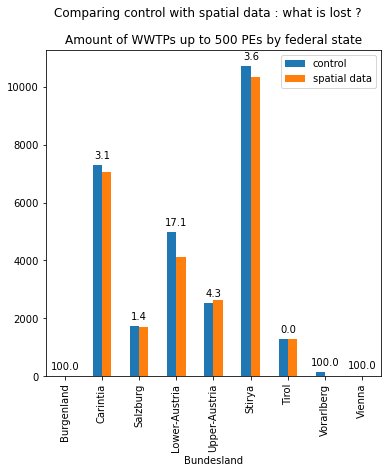

In [314]:
fig,ax=plt.subplots(figsize=(6,6))
control_df.plot.bar(y=['control_freq_all','freq_all'],ax=ax)
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_df['div'].round(1)]
values[4]=4.3

ax.legend(['control','spatial data'])
plt.suptitle('Comparing control with spatial data : what is lost ?')
ax.set_title('Amount of WWTPs up to 500 PEs by federal state')


#which=range(len(ax.patches))
#which=[6,7,8,9,10,11]
which=[0,1,2,3,4,5,6,7,8]
n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()+0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1
#add text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#fig.text(0.14, 0.8, 'difference in % on bar top', fontsize=14,
        #verticalalignment='top',bbox=props)
plt.savefig('graphs/all_precision.png', bbox_inches='tight')

# comparing KKA with KKA Gunter
    >looks good 
    > difference is due to missing spat ref

In [315]:
data_BL=data_all.groupby('BL').sum().reset_index()[['BL','PE_nonitri_small','sum_PE_small','freq_small']]
data_BL=data_BL[['BL','freq_small','sum_PE_small']]
data_BL=data_BL.set_index('BL')

control_KKA=control.join(data_BL, how='left')
control_KKA.rename(columns={'<=50PE':'control_freq', 'PE_sum':'control_sum_PE'}, inplace=True)
control_KKA=control_KKA[['control_freq','freq_small','control_sum_PE','sum_PE_small']]

control_KKA=control_KKA.fillna(0).astype(int)


control_KKA['div']=(control_KKA.control_freq-control_KKA.freq_small)/control_KKA.control_freq*100
control_KKA['div']=control_KKA['div'].round(2)
control_KKA.sort_values('div')
control_KKA

,control_freq,freq_small,control_sum_PE,sum_PE_small,div
Bundesland,,,,,
Burgenland,20,0,198,0,100.00
Carintia,6961,6734,62459,59923,3.26
Salzburg,1655,1623,20924,20260,1.93
Lower-Austria,4515,3599,50655,37533,20.29
Upper-Austria,2398,2453,29412,27430,-2.29
Stirya,10665,10232,85726,79653,4.06
Tirol,1096,1082,9508,8707,1.28
Vorarlberg,129,0,1331,0,100.00
Vienna,13,0,280,0,100.00


In [316]:
#5.4 % lost with spat ref
overall_freq=(control_KKA.control_freq.sum()-control_KKA.freq_small.sum())/control_KKA.control_freq.sum()*100
overall_freq

6.298266064403323

<AxesSubplot:xlabel='Bundesland'>

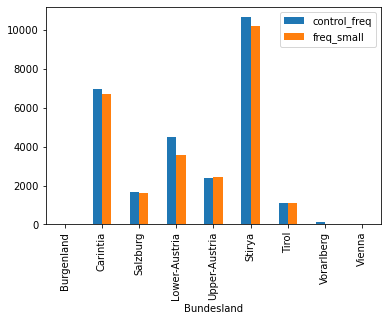

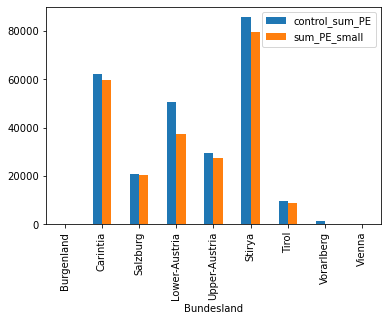

In [317]:
control_KKA.plot.bar(y=['control_freq','freq_small'])
control_KKA.plot.bar(y=['control_sum_PE','sum_PE_small'])

# result
    > relative small differences all in all
    > PE difference up to 16% for NOE
    > difference seems to stay similar when comparing <500 and <50. reason is probably some mask in code
    >5% lost with geo ref 

# check database VS Gunter : no spatial reduction

# check database of KKA
    > here no spat ref reduction

In [318]:
control=pd.read_excel('DATA/control_gunter.xlsx')
database_KKA=database[database.PE<=50]
database_KKA.PE=database.PE.astype(np.int64).round()
data_BL=database_KKA.groupby('BL').sum().reset_index()[['BL','PE']]
data_BL=data_BL[['BL','PE']]

x=database_KKA.groupby('BL').count().reset_index()[['BL','PE']]
x.rename(columns={'PE':'freq'},inplace=True)
data_BL=pd.merge(data_BL, x, on='BL')

control_db=control[['Bundesland','<=50PE','PE_sum']]
control_db.rename(columns={'Bundesland':'BL'},inplace=True)
control_db=pd.merge(control_db, data_BL, on='BL')
control_db=control_db[['BL','<=50PE','freq','PE_sum','PE']]

control_db
control_db['accuracy']=control_db['<=50PE']/control_db.freq*100
control_db['accuracy']=control_db['accuracy'].round(2)
control_db.sort_values('accuracy')

C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\fabrizio\anaconda3\envs\geo\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,BL,<=50PE,freq,PE_sum,PE,accuracy
4,Upper-Austria,2398,2522,29412,30880,95.08
6,Tirol,1096,1097,9508,9436,99.91
2,Salzburg,1655,1656,20924,20613,99.94
0,Burgenland,20,20,198,198,100.00
1,Carintia,6961,6961,62459,61470,100.00
5,Stirya,10665,10665,85726,85726,100.00
7,Vorarlberg,129,129,1331,1331,100.00
8,Vienna,13,13,280,280,100.00
3,Lower-Austria,4515,4390,50655,49166,102.85


In [319]:
#0.6 considering aslo Upper-Austria
overall_freq=(control_db['<=50PE'].sum()-control_db.freq.sum())/control_db['<=50PE'].sum()*100
overall_freq

-0.0036427218417601635

In [320]:
#0.03 lost in PE
overall_PE=(control_db.PE.sum()-control_db.PE_sum.sum())/control_db.PE.sum()*100
overall_PE

-0.537630258587418

# result
    > great! nearly perfect

# check database 500PE

In [321]:
control=pd.read_excel('DATA/control_gunter.xlsx')

database_all=database[database.PE<=500]
data_BL=database_all.groupby('BL').count().reset_index()[['BL','PE']]
data_BL.rename(columns={'PE':'freq'},inplace=True)
data_BL.set_index('BL',inplace=True)

control.set_index('Bundesland',inplace=True)
control_db=control.loc[:,'<=500PE']
control_db=pd.merge(control_db, data_BL, left_index=True, right_index=True)
control_db=control_db[['<=500PE','freq']]

control_db['diff']=(control_db['<=500PE']/control_db.freq)-1
control_db['diff']=control_db['diff'].round(2)
control_db

,<=500PE,freq,diff
Burgenland,23,23,0.00
Carintia,7279,7276,0.00
Salzburg,1732,1730,0.00
Lower-Austria,4982,4833,0.03
Upper-Austria,2524,2633,-0.04
Stirya,10718,10718,0.00
Tirol,1294,1294,0.00
Vorarlberg,156,156,0.00
Vienna,25,25,0.00


In [322]:
#0.6 considering aslo Upper-Austria
overall_freq=(control_db['<=500PE'].sum()-control_db.freq.sum())/control_db['<=500PE'].sum()*100


only_neg=control_db.drop(index=['Lower-Austria','Upper-Austria'])
overall_freq_neg=(only_neg['<=500PE'].sum()-only_neg.freq.sum())/only_neg['<=500PE'].sum()*100
overall_freq

0.15661434587408207

# result : great

In [323]:
#control_db
print(control_db['<=500PE'].sum())
print(control_db.freq.sum())
overall_freq

28733
28688


0.15661434587408207


    > maybe add definitoon of text as pathc below legend

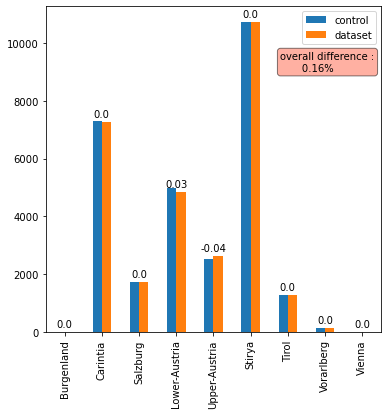

In [324]:
fig,ax=plt.subplots(figsize=(6,6))
control_db.plot.bar(y=['<=500PE','freq'],ax=ax)
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_db['diff'].round(2)]
#values[2]=0.0
#values[6]=5.0
ax.legend(['control','dataset'])
#plt.suptitle('Comparing the database with control')
#which=range(len(ax.patches))
#ax.set_title('Amount of WWTPs by federal state')

n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()-0.13 + rect.get_width() / 2, height+100 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='ultra-condensed')
        n=n+1

props = dict(boxstyle='round', facecolor='tomato', alpha=0.5)
ax.text(5.8, 9700, 'overall difference :\n       {}%'.format(overall_freq.round(2)), fontsize=10,
        verticalalignment='top',bbox=props)

        
plt.savefig('graphs/database_precision.png', bbox_inches='tight')

# control tech_type of KKA


### by PE

In [325]:
control=pd.read_excel('DATA/control_gunter.xlsx', sheet_name=1)
database_KKA=database[database.PE<=50]
KKA=database_KKA.groupby(['BL','tech_type']).PE.sum().reset_index().pivot('BL','tech_type','PE')
test=pd.merge(KKA,control, on="BL")
test=test.fillna(0)
#test['unbek+andere']=test.Andere+test.Unbekannt
x=test[['BL','Primary','mechan','Bel.','Belebung','PKA','PKA_','SBR','SBR_']]
x=x.set_index('BL').astype(int)
#x.T

### second column is always control

In [326]:
x['primary']=(x.mechan-x['Primary'])/x.mechan*100
x['belebung']=(x.Belebung-x['Bel.'])/x.Belebung*100
x['pka']=(x.PKA_-x.PKA)/x.PKA_*100
x['sbr']=(x.SBR_-x.SBR)/x.SBR_*100
#x['andere']=(x['Unbek+andere']-x['unbek+andere'])/x['Unbek+andere']*100
extract=x.iloc[:,-4:]
extract=extract.fillna(0).abs().round(1)



# like this numbers are smaller and less readable. relation stays the same

In [327]:
x['test']=(x.mechan-x['Primary'])/x.mechan.sum()

In [328]:
extract.rename(columns={'primary':'Primary','belebung':'ASP','pka':'CW','sbr':'SBR'},inplace=True)

In [329]:
extract=extract.reset_index().rename(columns={'BL':'Federal State'})
extract=extract.set_index('Federal State')


In [330]:
extract

,Primary,ASP,CW,SBR
Federal State,,,,
Burgenland,0.0,0.0,0.0,0.0
Carintia,1.8,1.9,0.5,0.0
Lower-Austria,14.4,2.8,0.9,0.1
Salzburg,2.0,1.6,0.5,0.3
Stirya,0.0,0.0,0.0,0.0
Tirol,3.9,0.2,0.9,0.1
Upper-Austria,20.9,0.1,14.9,17.1
Vorarlberg,0.0,6.6,0.0,0.0


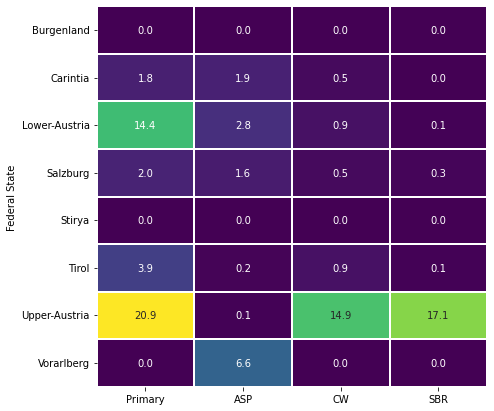

In [331]:
fi,ax=plt.subplots(figsize=(7,7))
sbn.heatmap(extract, cmap='viridis', annot=True, fmt='.1f', linewidths=0.01, ax=ax, cbar=False)
#ax.set_title('Percentual difference between data and control by state and technology for WWTPs <50 PE')
plt.savefig('graphs/heatmap_control.png', bbox_inches='tight')

## by freq

In [332]:
control=pd.read_excel('DATA/control_gunter.xlsx', sheet_name=2)
database_KKA=database[database.PE<=50]
KKA=database_KKA.groupby(['BL','tech_type']).PE.count().reset_index().pivot('BL','tech_type','PE')
test=pd.merge(KKA,control, on="BL")
test=test.fillna(0)
test['unbek+andere']=test.Andere+test.Unbekannt
x=test[['BL','Primary','mechan','Bel.','Belebung','PKA','PKA_','SBR','SBR_','unbek+andere','Unbek+andere']]
x=x.set_index('BL').astype(int)

AttributeError: 'DataFrame' object has no attribute 'Andere'

In [ ]:
x

,Primary,mechan,Bel.,Belebung,PKA,PKA_,SBR,SBR_,unbek+andere,Unbek+andere
BL,,,,,,,,,,
Burgenland,0,0,4,4,14,14,1,1,0,0
Carintia,2244,2248,3053,3051,556,556,567,566,161,160
Lower-Austria,255,256,452,452,891,893,2513,2513,276,255
Salzburg,306,304,233,234,279,279,274,274,55,12
Stirya,2386,2385,2532,2532,3276,3276,1044,1044,295,296
Tirol,668,660,92,92,60,61,108,107,42,49
Upper-Austria,310,381,658,646,540,475,862,702,128,4
Vorarlberg,14,14,8,7,4,4,28,28,0,1


In [ ]:
x['primary']=(x.mechan-x['Primary'])/x.mechan*100
x['belebung']=(x.Belebung-x['Bel.'])/x.Belebung*100
x['pka']=(x.PKA_-x.PKA)/x.PKA_*100
x['sbr']=(x.SBR_-x.SBR)/x.SBR_*100
x['andere']=(x['Unbek+andere']-x['unbek+andere'])/x['Unbek+andere']*100
extract=x.iloc[:,-5:]
extract=extract.fillna(0).abs().round(1)


In [ ]:
x

,Primary,mechan,Bel.,Belebung,PKA,PKA_,SBR,SBR_,unbek+andere,Unbek+andere,mechanich,belebung,pka,sbr,andere
BL,,,,,,,,,,,,,,,
Burgenland,0,0,4,4,14,14,1,1,0,0,NaN,0.000000,0.000000,0.000000,NaN
Carintia,2244,2248,3053,3051,556,556,567,566,161,160,0.177936,-0.065552,0.000000,-0.176678,-0.625000
Lower-Austria,255,256,452,452,891,893,2513,2513,276,255,0.390625,0.000000,0.223964,0.000000,-8.235294
Salzburg,306,304,233,234,279,279,274,274,55,12,-0.657895,0.427350,0.000000,0.000000,-358.333333
Stirya,2386,2385,2532,2532,3276,3276,1044,1044,295,296,-0.041929,0.000000,0.000000,0.000000,0.337838
Tirol,668,660,92,92,60,61,108,107,42,49,-1.212121,0.000000,1.639344,-0.934579,14.285714
Upper-Austria,310,381,658,646,540,475,862,702,128,4,18.635171,-1.857585,-13.684211,-22.792023,-3100.000000
Vorarlberg,14,14,8,7,4,4,28,28,0,1,0.000000,-14.285714,0.000000,0.000000,100.000000


# check
    > LOWer austria unbekkant > data problem >ask gunter
    > stiria has higher control unbekkant
    > Upper AUS andere > new data

# RESULT
## EVERYTHING LOOKS GOOD, EXCEPT FOR UNBEKANNT. NÖ is particularly bad!

# differnece between database and spatial dtaset

In [ ]:
database=pd.read_excel('final/database.xlsx')
database.PE=database.PE.astype(np.int64).round()

In [337]:
database.rename(columns={'BL':'Federal State'},inplace=True)

In [338]:
db=database.groupby('Federal State').sum().reset_index().set_index('Federal State')
d=data_all.groupby('BL').sum().reset_index().set_index('BL')


In [340]:
#x=pd.merge(db,d, left_index=True, right_index=True)[['PE','sum_PE']].astype(int)
#x['diff']=(x.PE-x.sum_PE)/x.PE*100

x=db.join(d).fillna(0)
x.sum_PE_tot.replace({30336.960000:30222}, inplace=True)
x['diff']=(x.PE-x.sum_PE_tot)/x.PE*100


In [341]:
x

,year,PE,Adresse,ID Nr.,%PE_nonitri_medium,%PE_nonitri_small,%PE_nonitri_tot,%no_nitri_medium,%no_nitri_small,%no_nitri_tot,...,freq_medium,freq_small,freq_tot,no_nitri_medium,no_nitri_small,no_nitri_tot,sum_PE_medium,sum_PE_small,sum_PE_tot,diff
Federal State,,,,,,,,,,,,,,,,,,,,,
Burgenland,44267,948,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000
Carintia,14474683,100001,0.0,0.0,11124.793282,18649.670312,21577.956706,11220.000000,21096.578643,22053.547821,...,318.0,6734.0,7052.0,186.0,2149.0,2335.0,37909.066667,59923.493151,97832.559817,2.168418
Lower-Austria,9694818,123208,0.0,0.0,2414.641837,8486.048107,9255.692262,2533.333333,8387.168759,9384.957820,...,531.0,3599.0,4130.0,27.0,235.0,262.0,77210.000000,37533.000000,114743.000000,6.870495
Salzburg,3454175,30222,0.0,0.0,702.293130,4736.878604,4447.797708,716.666667,5737.124294,5554.005042,...,85.0,1623.0,1708.0,10.0,298.0,308.0,10076.133333,20260.826667,30222.000000,0.000000
Stirya,21058799,90558,0.0,0.0,2929.411765,22064.242496,22975.168398,2933.333333,30250.812888,30616.645909,...,106.0,10232.0,10338.0,35.0,2094.0,2129.0,7242.000000,79653.000000,86895.000000,4.044921
Tirol,2576060,32359,0.0,0.0,3020.559928,9051.393117,9043.494374,3144.837662,15019.449323,14695.230370,...,212.0,1082.0,1294.0,71.0,664.0,735.0,23677.693333,8707.533333,32385.226667,-0.081049
Upper-Austria,5253862,48172,0.0,0.0,100.000000,7685.426799,7172.474979,100.000000,8704.763104,8458.990129,...,180.0,2453.0,2633.0,1.0,367.0,368.0,20742.000000,27430.000000,48172.000000,0.000000
Vienna,49719,1550,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000
Vorarlberg,313206,5703,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000


In [342]:
#all in all difeerence
(x.PE.sum()-x.sum_PE_tot.sum())/x.PE.sum()*100

5.193002769909868

In [343]:
excluded_states=x.loc['Carintia':'Upper-Austria',:]

# loss when referencing to spatial: database Vs spatial. keep only this

In [345]:
#x=x.set_index('Federal State')
x

,year,PE,Adresse,ID Nr.,%PE_nonitri_medium,%PE_nonitri_small,%PE_nonitri_tot,%no_nitri_medium,%no_nitri_small,%no_nitri_tot,...,freq_medium,freq_small,freq_tot,no_nitri_medium,no_nitri_small,no_nitri_tot,sum_PE_medium,sum_PE_small,sum_PE_tot,diff
Federal State,,,,,,,,,,,,,,,,,,,,,
Burgenland,44267,948,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000
Carintia,14474683,100001,0.0,0.0,11124.793282,18649.670312,21577.956706,11220.000000,21096.578643,22053.547821,...,318.0,6734.0,7052.0,186.0,2149.0,2335.0,37909.066667,59923.493151,97832.559817,2.168418
Lower-Austria,9694818,123208,0.0,0.0,2414.641837,8486.048107,9255.692262,2533.333333,8387.168759,9384.957820,...,531.0,3599.0,4130.0,27.0,235.0,262.0,77210.000000,37533.000000,114743.000000,6.870495
Salzburg,3454175,30222,0.0,0.0,702.293130,4736.878604,4447.797708,716.666667,5737.124294,5554.005042,...,85.0,1623.0,1708.0,10.0,298.0,308.0,10076.133333,20260.826667,30222.000000,0.000000
Stirya,21058799,90558,0.0,0.0,2929.411765,22064.242496,22975.168398,2933.333333,30250.812888,30616.645909,...,106.0,10232.0,10338.0,35.0,2094.0,2129.0,7242.000000,79653.000000,86895.000000,4.044921
Tirol,2576060,32359,0.0,0.0,3020.559928,9051.393117,9043.494374,3144.837662,15019.449323,14695.230370,...,212.0,1082.0,1294.0,71.0,664.0,735.0,23677.693333,8707.533333,32385.226667,-0.081049
Upper-Austria,5253862,48172,0.0,0.0,100.000000,7685.426799,7172.474979,100.000000,8704.763104,8458.990129,...,180.0,2453.0,2633.0,1.0,367.0,368.0,20742.000000,27430.000000,48172.000000,0.000000
Vienna,49719,1550,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000
Vorarlberg,313206,5703,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000


In [346]:
x.drop(index=['Burgenland','Vorarlberg','Vienna'],inplace=True)

In [347]:
x

,year,PE,Adresse,ID Nr.,%PE_nonitri_medium,%PE_nonitri_small,%PE_nonitri_tot,%no_nitri_medium,%no_nitri_small,%no_nitri_tot,...,freq_medium,freq_small,freq_tot,no_nitri_medium,no_nitri_small,no_nitri_tot,sum_PE_medium,sum_PE_small,sum_PE_tot,diff
Federal State,,,,,,,,,,,,,,,,,,,,,
Carintia,14474683,100001,0.0,0.0,11124.793282,18649.670312,21577.956706,11220.000000,21096.578643,22053.547821,...,318.0,6734.0,7052.0,186.0,2149.0,2335.0,37909.066667,59923.493151,97832.559817,2.168418
Lower-Austria,9694818,123208,0.0,0.0,2414.641837,8486.048107,9255.692262,2533.333333,8387.168759,9384.957820,...,531.0,3599.0,4130.0,27.0,235.0,262.0,77210.000000,37533.000000,114743.000000,6.870495
Salzburg,3454175,30222,0.0,0.0,702.293130,4736.878604,4447.797708,716.666667,5737.124294,5554.005042,...,85.0,1623.0,1708.0,10.0,298.0,308.0,10076.133333,20260.826667,30222.000000,0.000000
Stirya,21058799,90558,0.0,0.0,2929.411765,22064.242496,22975.168398,2933.333333,30250.812888,30616.645909,...,106.0,10232.0,10338.0,35.0,2094.0,2129.0,7242.000000,79653.000000,86895.000000,4.044921
Tirol,2576060,32359,0.0,0.0,3020.559928,9051.393117,9043.494374,3144.837662,15019.449323,14695.230370,...,212.0,1082.0,1294.0,71.0,664.0,735.0,23677.693333,8707.533333,32385.226667,-0.081049
Upper-Austria,5253862,48172,0.0,0.0,100.000000,7685.426799,7172.474979,100.000000,8704.763104,8458.990129,...,180.0,2453.0,2633.0,1.0,367.0,368.0,20742.000000,27430.000000,48172.000000,0.000000


In [348]:
x[['sum_PE_tot','PE']]
#x.sum_PE_tot.replace({30336.960000:30222}, inplace=True)

,sum_PE_tot,PE
Federal State,,
Carintia,97832.559817,100001
Lower-Austria,114743.000000,123208
Salzburg,30222.000000,30222
Stirya,86895.000000,90558
Tirol,32385.226667,32359
Upper-Austria,48172.000000,48172


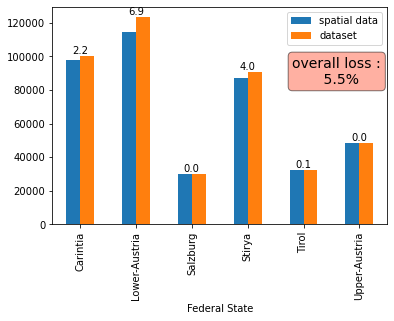

In [350]:
# add % difference!
fig,ax=plt.subplots()
x.sort_values('Federal State').plot.bar(y=['sum_PE_tot','PE'],ax=ax)

which=[9,10,11,12,13,14,15,16,17]
values=[x for x in x.sort_values('Federal State')['diff'].round(1).abs()]
#values[5]=4.3

overall_freq=(control_df.control_freq_all.sum()-control_df.freq_all.sum())/control_df.control_freq_all.sum()*100

ax.legend(['spatial data','dataset'])
#plt.suptitle('Amount of PEs by federal state')
#ax.set_title('difference in % on bar top')


#which=range(len(ax.patches))
which=[6,7,8,9,10,11]
#which=[0,1,2,3,4,5]
n=0
for index, rect in enumerate(ax.patches):
    if index in which:
        
        height = rect.get_height()
        ax.text(rect.get_x()-0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1
#add text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#fig.text(0.39, -0.1, 'difference in % on bar top', fontsize=14,
        #verticalalignment='top',bbox=props)
props = dict(boxstyle='round', facecolor='tomato', alpha=0.5)
ax.text(3.8, 100000, 'overall loss :\n       {}%'.format(overall_freq.round(1)), fontsize=14,
        verticalalignment='top',bbox=props)
plt.savefig('graphs/spatial_precision.png', bbox_inches='tight')


IndexError: list index out of range

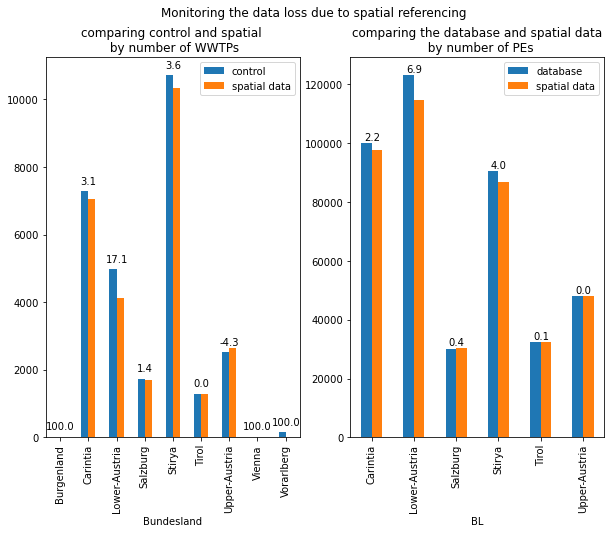

In [ ]:
# add % difference!
fig,ax=plt.subplots(1,2, figsize=(10,7))

#spatial with control
control_df.sort_index().plot.bar(y=['control_freq_all','freq_all'],ax=ax[0])
which=[9,10,11,12,13,14,15,16,17]
values=[x for x in control_df.sort_index()      ['div'].round(1)]
#values[5]=4.3
ax[0].legend(['control','spatial data'])
plt.suptitle('Monitoring the data loss due to spatial referencing ')
ax[0].set_title('comparing control and spatial \n by number of WWTPs')
which=[0,1,2,3,4,5,6,7,8]
n=0

for index, rect in enumerate(ax[0].patches):
    if index in which:
        
        height = rect.get_height()
        ax[0].text(rect.get_x()+0.13 + rect.get_width() / 2, height+150 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1


#second ax
x.plot.bar(y=['PE','sum_PE_tot'],ax=ax[1])
which=[0,1,2,3,4,5,6,7,8]

values=[x for x in x['diff'].round(1).abs()]
ax[1].legend(['database','spatial data'])
ax[1].set_title('comparing the database and spatial data\n  by number of PEs')

n=0
for index, rect in enumerate(ax[1].patches):
    if index in which:
        
        height = rect.get_height()
        ax[1].text(rect.get_x()+0.13 + rect.get_width() / 2, height+250 , values[n],
                ha='center', va='bottom', fontsize='medium', fontstretch='condensed')
        n=n+1

overall_freq=(control_df.control_freq_all.sum()-control_df.freq_all.sum())/control_df.control_freq_all.sum()*100
#add text
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
fig.text(0.39, -0.1, 'difference in % on bar top', fontsize=14,
        verticalalignment='top',bbox=props)
props = dict(boxstyle='round', facecolor='tomato', alpha=0.5)
ax[0].text(5.1, 9700, 'overall loss :\n       {}%'.format(overall_freq.round(1)), fontsize=14,
        verticalalignment='top',bbox=props)

overall_PE=(x.PE.sum()-x.sum_PE_tot.sum())/x.PE.sum()*100
#add text2
ax[1].text(5.1, 120000, 'overall loss :\n       {}%'.format(overall_PE.round(1)), fontsize=14,
        verticalalignment='top',bbox=props)
plt.savefig('graphs/spatial_precision.png', bbox_inches='tight')

# result : 
    > very good. minimal difference
    > we can say : because control and datbase are same, overall data loss with spatial is 5.5%